In [1]:
import sys 
import os
import nltk.corpus
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
from matplotlib import pyplot

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tatha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tatha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tatha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
file_path = "D:\\pg\\classes\\project\\code\\"
#file_path = '/content/' 
sys.path.append(os.path.abspath(file_path)) 

data_to_keep=10000

df_ed_out = pd.read_csv(file_path+'df_encoder_decoder_output.csv')
df_ed_out.drop(df_ed_out.index[data_to_keep:len(df_ed_out.index)], axis=0, inplace=True)


#symbols to remove
var_symbols = ["~", "!", "@", "#", "$", "%", "^", "&", "*", "(", 
                ")", "_", "+", "`", "-", "=", "[", "]", "\\", "{", 
                "}", "|", ";", "'", ":", '"', ",", ".", "/", "<", ">", "?", "  "]

contraction_mapping = {"ain't": "is not", "aren't": "are not", "can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                       "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                       "he'd": "he would", "he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                       "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have", "i'd": "i would",
                       "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                       "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us", "ma'am": "madam",
                       "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have",
                       "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock",
                       "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                       "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                       "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have", "so's": "so as",
                       "this's": "this is", "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                       "there'd've": "there would have", "there's": "there is", "here's": "here is", "they'd": "they would", "they'd've": "they would have",
                       "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                       "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                       "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                       "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                       "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                       "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                       "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are", "y'all've": "you all have",
                       "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                       "you're": "you are", "you've": "you have"}

stop_words = set(stopwords.words('english'))

#declare dataframes to store cleaned data
df_ed_out_cleaned = pd.DataFrame()

for index, row in df_ed_out.iterrows():
    var_type=row.loc['Type']
    var_plot=row.loc['Plot']
    var_osummary=row.loc['Original_summary']
    var_psummary=row.loc['Predicted_summary']
    var_tmp_osummary=var_osummary
    var_tmp_psummary=var_psummary
    var_tmp_plot=var_plot
    for iter2 in var_symbols:
        var_tmp_osummary = str(var_tmp_osummary).replace(iter2, ' ').lower()
        var_tmp_psummary = str(var_tmp_psummary).replace(iter2, ' ').lower()
        var_tmp_plot = str(var_tmp_plot).replace(iter2, ' ').lower()
    
    var_tmp_plot = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in var_tmp_plot.split(" ")])
    var_tmp_osummary = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in var_tmp_osummary.split(" ")])
    var_tmp_psummary = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in var_tmp_psummary.split(" ")])

    plot_tokens = word_tokenize(var_tmp_plot)
    var_plot_cleaned = ''
    for w in plot_tokens:
        if w not in stop_words:
            var_plot_cleaned+=w+' '

    osummary_tokens = word_tokenize(var_tmp_osummary)
    var_osummary_cleaned = ''
    for w in osummary_tokens:
        if w not in stop_words:
            var_osummary_cleaned+=w+' '

    psummary_tokens = word_tokenize(var_tmp_psummary)
    var_psummary_cleaned = ''
    for w in psummary_tokens:
        if w not in stop_words:
            var_psummary_cleaned+=w+' '
    
    plot_tokens = word_tokenize(var_plot_cleaned)
    osummary_tokens = word_tokenize(var_osummary_cleaned)
    psummary_tokens = word_tokenize(var_psummary_cleaned)
    
    new_row = {'var_type':var_type, 'plot_tokens':plot_tokens, 'osummary_tokens':osummary_tokens, 'psummary_tokens':psummary_tokens}
    df_ed_out_cleaned = pd.concat([df_ed_out_cleaned, pd.DataFrame([new_row])], ignore_index=True)

In [3]:
from statistics import mode
plot_word_count = []
osummary_word_count = []
psummary_word_count = []

# populate the lists with sentence lengths
for i in df_ed_out_cleaned['plot_tokens']:
      plot_word_count.append(len(i))

for i in df_ed_out_cleaned['osummary_tokens']:
      osummary_word_count.append(len(i))

for i in df_ed_out_cleaned['psummary_tokens']:
      psummary_word_count.append(len(i))

max_len_plot=mode(plot_word_count) 
max_len_osummary=mode(osummary_word_count)
max_len_psummary=mode(psummary_word_count)

In [4]:
max_len_plot

28

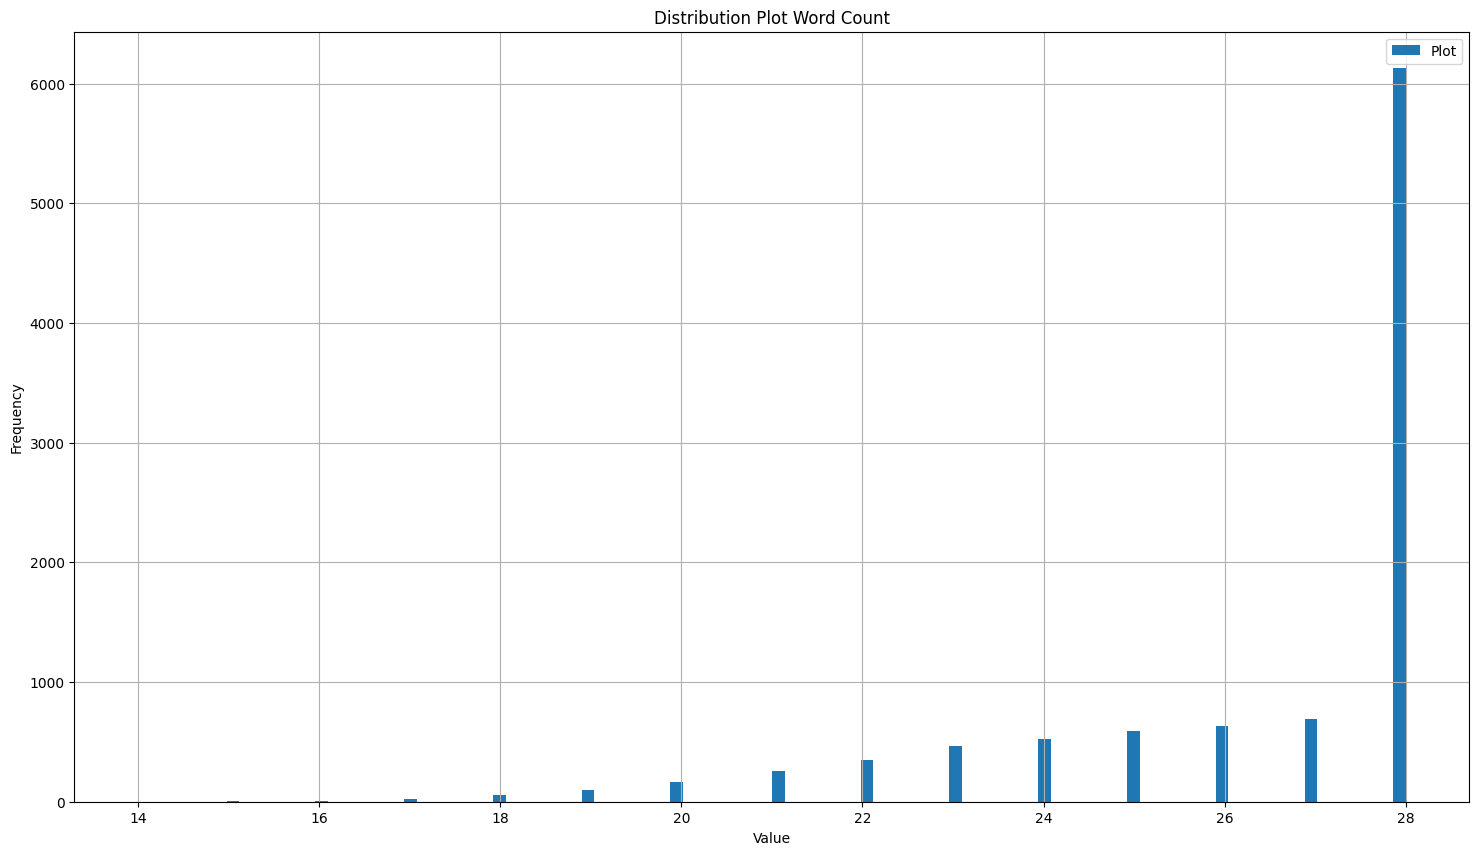

In [5]:
pyplot.figure(figsize=(18,10))
pyplot.hist(plot_word_count, bins=100, label='Plot')
pyplot.title('Distribution Plot Word Count')
pyplot.xlabel('Value')
pyplot.ylabel('Frequency')
pyplot.legend()
pyplot.grid()
pyplot.show()


In [6]:
max_len_osummary

6

In [7]:
max_len_psummary

5

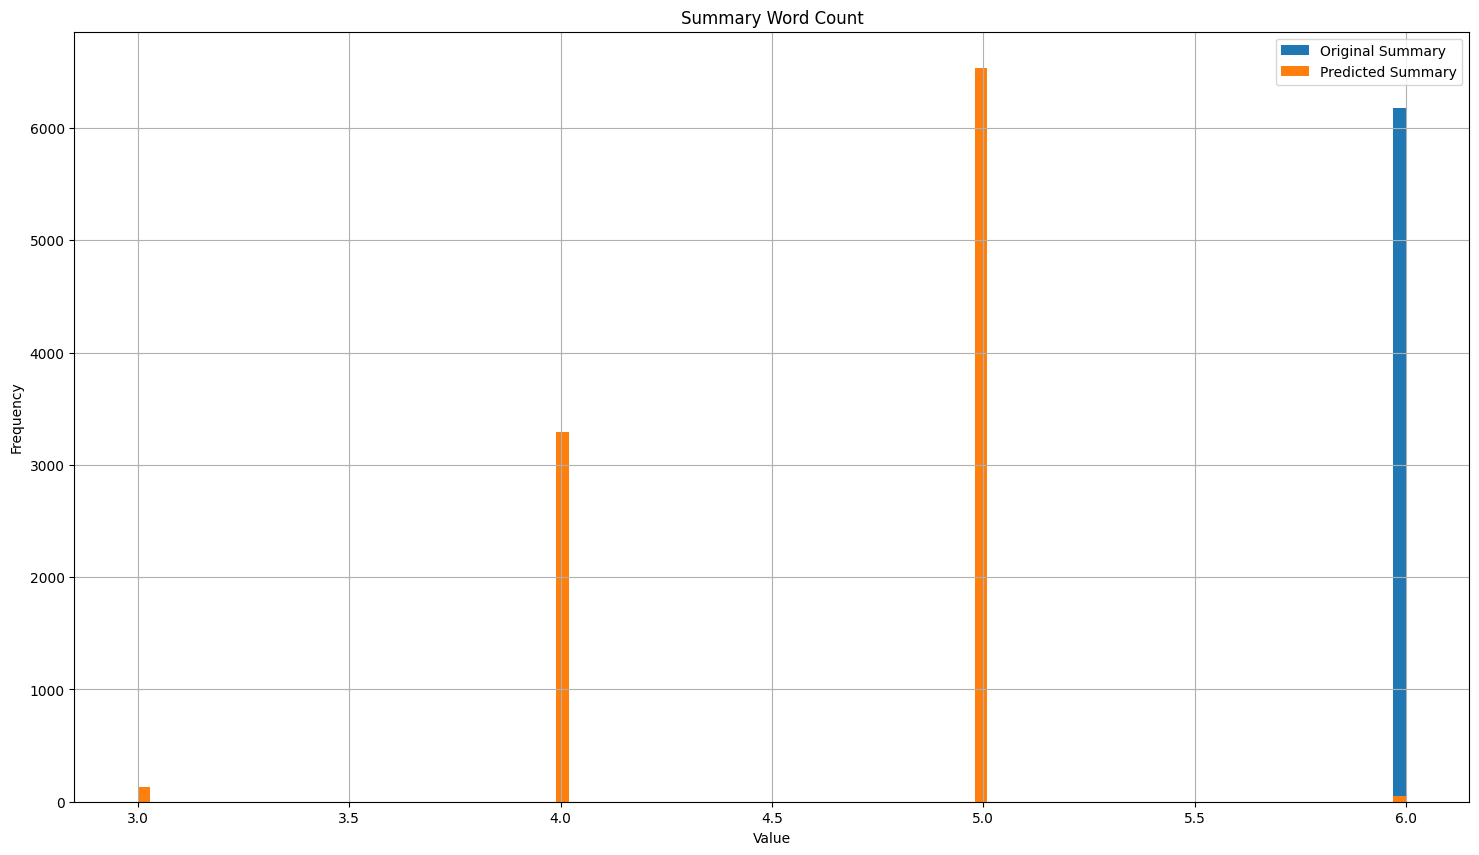

In [8]:
pyplot.figure(figsize=(18,10))
pyplot.hist(osummary_word_count, bins=100, label='Original Summary')
pyplot.hist(psummary_word_count, bins=100, label='Predicted Summary')
pyplot.title('Summary Word Count')
pyplot.xlabel('Value')
pyplot.ylabel('Frequency')
pyplot.legend()
pyplot.grid()
pyplot.show()

In [9]:
from sklearn.model_selection import train_test_split

data_test_size=0.3

psummary_tr,psummary_val,osummary_tr,osummary_val=train_test_split(df_ed_out_cleaned['psummary_tokens'],df_ed_out_cleaned['osummary_tokens'],
                                        test_size=data_test_size,random_state=0,shuffle=True)

In [10]:
from keras.preprocessing.text import Tokenizer 
from keras.utils import pad_sequences
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(psummary_tr))
psummary_tr    =   x_tokenizer.texts_to_sequences(psummary_tr) 
psummary_val   =   x_tokenizer.texts_to_sequences(psummary_val)
psummary_tr    =   pad_sequences(psummary_tr,  maxlen=max_len_psummary, padding='post') 
psummary_val   =   pad_sequences(psummary_val, maxlen=max_len_psummary, padding='post')
psummary_voc_size   =  len(x_tokenizer.word_index) +1

In [11]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(osummary_tr))
osummary_tr    =   y_tokenizer.texts_to_sequences(osummary_tr) 
osummary_val   =   y_tokenizer.texts_to_sequences(osummary_val)
osummary_tr    =   pad_sequences(osummary_tr,  maxlen=max_len_osummary, padding='post') 
osummary_val   =   pad_sequences(osummary_val, maxlen=max_len_osummary, padding='post')
osummary_voc_size   =  len(y_tokenizer.word_index) +1

In [12]:
var_type = df_ed_out_cleaned['var_type']

plot_tokens = df_ed_out_cleaned['plot_tokens']
plot_tokenizer = Tokenizer()
plot_tokenizer.fit_on_texts(list(plot_tokens))
plot_tokens    =   plot_tokenizer.texts_to_sequences(plot_tokens)
plot_tokens    =   pad_sequences(plot_tokens,  maxlen=max_len_plot, padding='post') 
plot_tokens_voc_size   =  len(plot_tokenizer.word_index) +1
reverse_plot_tokens_word_index=plot_tokenizer.index_word
plot_tokens_word_index=plot_tokenizer.word_index

psummary_tokens = df_ed_out_cleaned['psummary_tokens']
psummary_tokenizer = Tokenizer()
psummary_tokenizer.fit_on_texts(list(psummary_tokens))
psummary_tokens    =   psummary_tokenizer.texts_to_sequences(psummary_tokens)
psummary_tokens    =   pad_sequences(psummary_tokens,  maxlen=max_len_psummary, padding='post') 
psummary_tokens_voc_size   =  len(psummary_tokenizer.word_index) +1
reverse_psummary_tokens_word_index=psummary_tokenizer.index_word
psummary_tokens_word_index=psummary_tokenizer.word_index

osummary_tokens = df_ed_out_cleaned['osummary_tokens']
osummary_tokenizer = Tokenizer()
osummary_tokenizer.fit_on_texts(list(osummary_tokens))
osummary_tokens    =   osummary_tokenizer.texts_to_sequences(osummary_tokens)
osummary_tokens    =   pad_sequences(osummary_tokens,  maxlen=max_len_osummary, padding='post') 
osummary_tokens_voc_size   =  len(osummary_tokenizer.word_index) +1
reverse_osummary_tokens_word_index=osummary_tokenizer.index_word
osummary_tokens_word_index=osummary_tokenizer.word_index

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import time

vocab_size = plot_tokens_voc_size
#embed_size = 100
#hidden_size = 256
embed_size = int(min(500, vocab_size/2)/2)
hidden_size = embed_size*2
num_layers = 2
batch_size = 30
epochs = batch_size*2
learning_rate = 0.001
early_stopping_rounds = 3
gdropout=0.5

In [14]:
plot_tokens_voc_size

18182

In [15]:
embed_size

250

In [16]:
# Define the Generator
class Generator(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers, dropout=gdropout):
        super(Generator, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x, h):
        x = self.embedding(x)
        output, h = self.rnn(x, h)
        output = self.fc(self.dropout(output))
        output = torch.sigmoid(output)
        return output, h

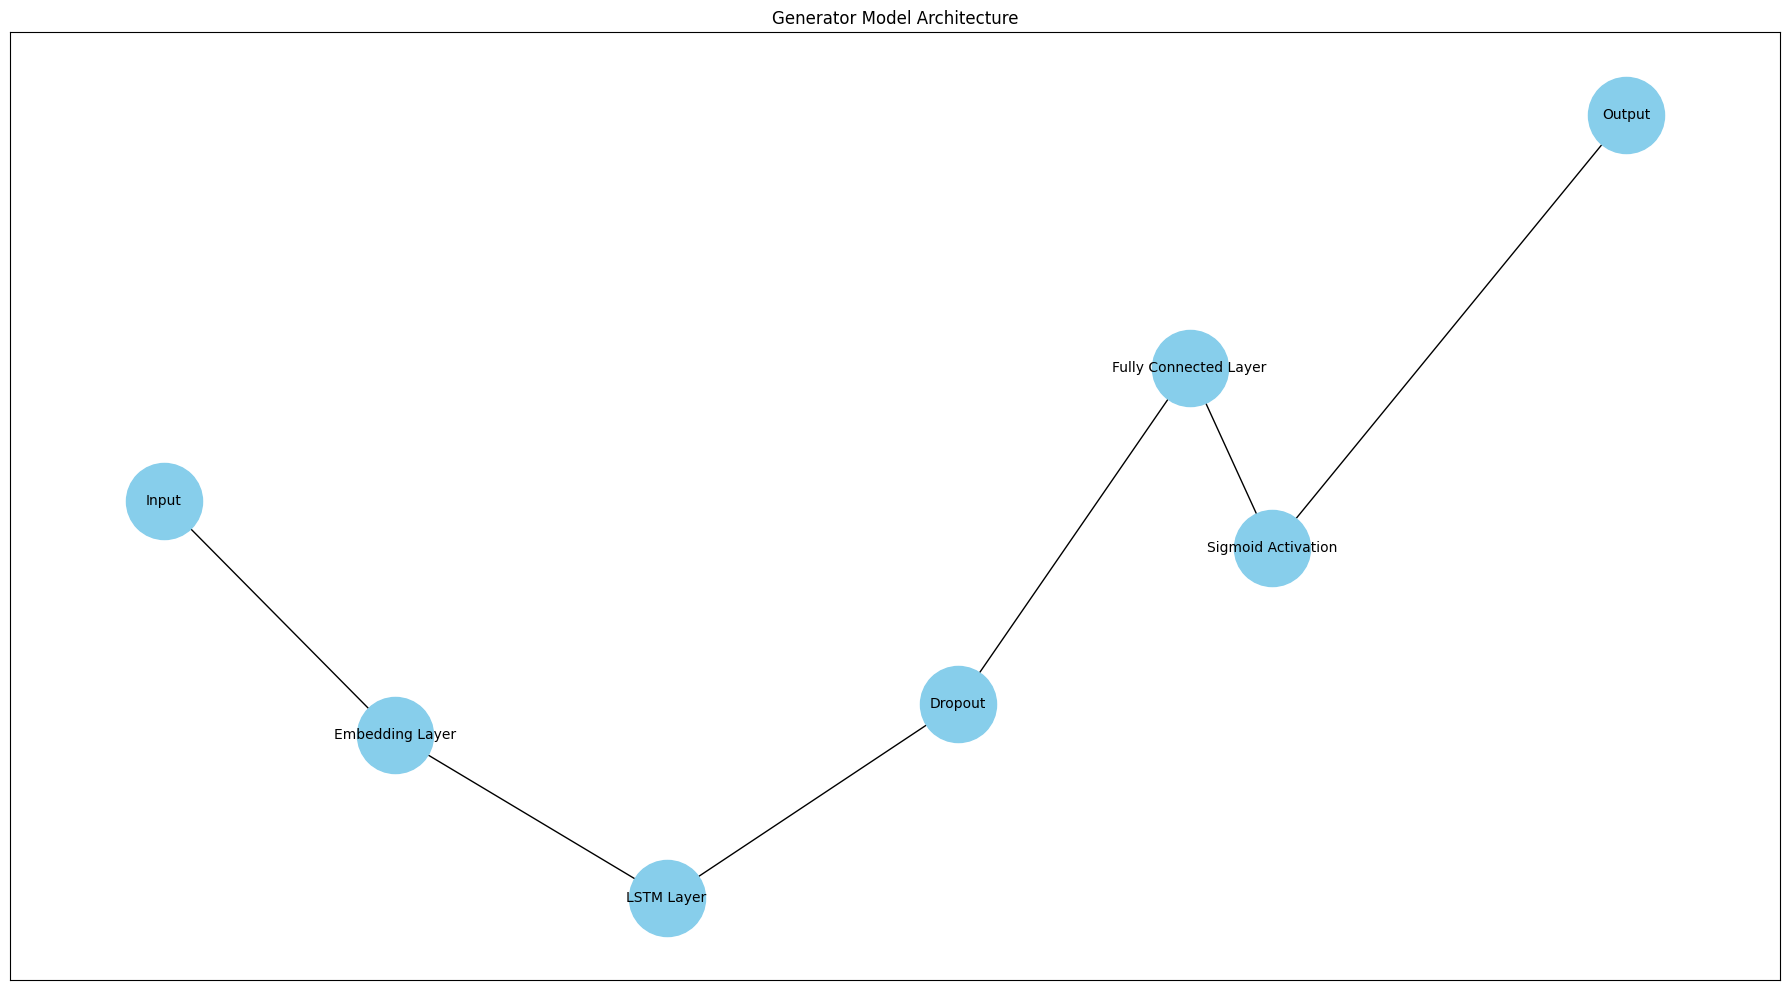

In [17]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes with their descriptions
nodes = {
    'input': 'Input',
    'embedding': 'Embedding Layer',
    'lstm': 'LSTM Layer',
    'dropout': 'Dropout',
    'fc': 'Fully Connected Layer',
    'sigmoid': 'Sigmoid Activation',
    'output': 'Output'
}

for node, description in nodes.items():
    G.add_node(node, description=description)

# Define the edges and the order they connect the nodes
edges = [('input', 'embedding'),
         ('embedding', 'lstm'),
         ('lstm', 'dropout'),
         ('dropout', 'fc'),
         ('fc', 'sigmoid'),
         ('sigmoid', 'output')]

G.add_edges_from(edges)

# Draw the network architecture
pos = nx.spring_layout(G)
pyplot.figure(figsize=(18,10))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=3000)

# Draw edges
nx.draw_networkx_edges(G, pos)

# Draw node labels
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'description'), font_size=10)

pyplot.title("Generator Model Architecture")
pyplot.axis('on')
pyplot.tight_layout()
pyplot.show()


In [30]:
generator = Generator(vocab_size, embed_size, hidden_size, num_layers)
g_optimizer = optim.Adam(generator.parameters(), lr=learning_rate)
g_criterion = nn.CrossEntropyLoss()

In [31]:
PRETRAIN=True

START >> below section used to pretrain the generator (if needed)

In [32]:
if PRETRAIN:
    average_tr_loss_count = []
    internal_tr_loss_count = []
    internal_val_loss_count = []
    average_val_loss_count = []
    def pretrain_generator(generator, psummary_tr, psummary_val, optimizer, pretrain_epochs, num_layers, hidden_size, batch_size):
        psummary_tr=torch.tensor(psummary_tr)
        psummary_tr=torch.split(psummary_tr, batch_size, dim=0)
        
        psummary_val = torch.tensor(psummary_val)
        psummary_val = torch.split(psummary_val, batch_size, dim=0)
        
        h_0 = torch.zeros(num_layers, max_len_psummary, hidden_size)
        c_0 = torch.zeros(num_layers, max_len_psummary, hidden_size)
        hidden = (h_0, c_0)
        
        best_val_loss = float('inf')
        rounds_without_improvement = 0
        for epoch in range(pretrain_epochs):
            total_loss = 0
            internal_tr_loss_count.append([])
            generator.train()
            for plot_tensor in psummary_tr:  # Iterate over tensor batches only
                tstart = time.time()
                plot_tensor = plot_tensor.squeeze()  # Reshape plot_tensor to (seq_len,)
                plot_tensor = plot_tensor.permute(1, 0)  # Reshape plot_tensor to (seq_len, batch_size)
                optimizer.zero_grad()
                output, _ = generator(plot_tensor, hidden)
                loss = g_criterion(output.reshape(-1, vocab_size), plot_tensor.reshape(-1).long())
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
                internal_tr_loss_count[epoch].append(loss.item())
                tend = time.time()
            avg_tr_loss = total_loss / len(psummary_tr)
            print(f"Training: Epoch {epoch + 1}/{pretrain_epochs}, Average-G-Loss: {avg_tr_loss}, Duration: {tend - tstart}")
            average_tr_loss_count.append(avg_tr_loss)

            # Validation phase
            generator.eval()  # set the model to evaluation mode
            total_val_loss = 0
            internal_val_loss_count.append([])
            with torch.no_grad():  # do not calculate gradients
                for plot_tensor in psummary_val:
                    tstart = time.time()
                    plot_tensor = plot_tensor.squeeze()
                    plot_tensor = plot_tensor.permute(1, 0)
                    output, _ = generator(plot_tensor, hidden)
                    val_loss = g_criterion(output.reshape(-1, vocab_size), plot_tensor.reshape(-1).long())
                    total_val_loss += val_loss.item()
                    tend = time.time()
                    internal_val_loss_count[epoch].append(val_loss.item())
                avg_val_loss = total_val_loss / len(psummary_val)
                print(f"Testing: Epoch {epoch + 1}/{pretrain_epochs}, Average-G-Loss: {avg_val_loss}, Duration: {tend - tstart}")
                average_val_loss_count.append(avg_val_loss)

            # Early stopping check
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                rounds_without_improvement = 0
            else:
                rounds_without_improvement += 1

            if rounds_without_improvement == early_stopping_rounds:
                print("Early stopping triggered")
                break

    # Pretrain the Generator
    pretrain_generator(generator, psummary_tr, psummary_val, g_optimizer, epochs, num_layers, hidden_size, batch_size)

Training: Epoch 1/60, Average-G-Loss: 9.193771464192968, Duration: 0.13708829879760742
Testing: Epoch 1/60, Average-G-Loss: 9.053260660171508, Duration: 0.05559229850769043
Training: Epoch 2/60, Average-G-Loss: 9.077418914208046, Duration: 0.1321702003479004
Testing: Epoch 2/60, Average-G-Loss: 9.031712427139283, Duration: 0.04627823829650879
Training: Epoch 3/60, Average-G-Loss: 9.061186060946213, Duration: 0.1374368667602539
Testing: Epoch 3/60, Average-G-Loss: 9.025313234329223, Duration: 0.05408287048339844
Training: Epoch 4/60, Average-G-Loss: 9.054016810197096, Duration: 0.14176082611083984
Testing: Epoch 4/60, Average-G-Loss: 9.021032886505127, Duration: 0.06397604942321777
Training: Epoch 5/60, Average-G-Loss: 9.050149159553724, Duration: 0.14270353317260742
Testing: Epoch 5/60, Average-G-Loss: 9.018286247253418, Duration: 0.05385231971740723


In [ ]:
# if PRETRAIN:
#     counter=0
#     total=0
#     for i in internal_tr_loss_count:
#         for j in i:
#             total+=j
#             counter+=1

#     print('internal_tr_loss_count: '+str(total/counter))

In [ ]:
# if PRETRAIN:
#     counter=0
#     total=0
#     for i in internal_tr_loss_count:
#         for j in i:
#             total+=j
#             counter+=1

#     print('internal_val_loss_count: '+str(total/counter))

In [ ]:
if PRETRAIN:
    counter=0
    total=0
    for i in average_tr_loss_count:
        total+=i
        counter+=1

    print('average_tr_loss_count: '+str(total/counter))

In [ ]:
if PRETRAIN:
    counter=0
    total=0
    for i in average_val_loss_count:
        total+=i
        counter+=1

    print('average_val_loss_count: '+str(total/counter))

In [ ]:
if PRETRAIN:
    pyplot.figure(figsize=(18,10))
    pyplot.plot(average_tr_loss_count, color='orange', label='Average Training Loss')
    pyplot.plot(average_val_loss_count, color='royalblue', label='Average Validation Loss')
    pyplot.title("Average Loss")
    pyplot.xlabel("Pretraining Epochs")
    pyplot.ylabel("Loss")
    pyplot.legend()
    pyplot.grid()
    pyplot.show()

    pyplot.figure(figsize=(18,10))
    pyplot.plot(internal_tr_loss_count, color='orange', label='Internal Training Loss')
    pyplot.plot(internal_val_loss_count, color='royalblue', label='Internal Validation Loss')
    pyplot.title("Internal Loss")
    pyplot.xlabel("Pretraining Epochs")
    pyplot.ylabel("Loss")
    handles, labels = pyplot.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    pyplot.legend(by_label.values(), by_label.keys())
    pyplot.grid()
    pyplot.show()

END >> below section used to pretrain the generator (if needed)

In [ ]:
ddropout=0.5
g_criterion = nn.L1Loss()
d_criterion = nn.L1Loss()

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers, dropout=ddropout):
        super(Discriminator, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x, h):
        x = self.embedding(x)
        output, h = self.rnn(x, h)
        output = output.mean(dim=1)  # Apply mean pooling to the sequence
        output = self.fc(self.dropout(output))
        output = torch.sigmoid(output)  # Apply sigmoid to get a probability
        return output, h

In [ ]:
# Re-importing required libraries and setting up the data for the Discriminator model visualization
import networkx as nx

# Define nodes and edges for the Discriminator model
nodes_discriminator = {
    'input': 'Input',
    'embedding': 'Embedding Layer',
    'lstm': 'LSTM Layer',
    'dropout': 'Dropout',
    'mean_pooling': 'Mean Pooling',
    'fc': 'Fully Connected Layer',
    'sigmoid': 'Sigmoid Activation',
    'output': 'Output'
}

edges_discriminator = [('input', 'embedding'),
                       ('embedding', 'lstm'),
                       ('lstm', 'dropout'),
                       ('dropout', 'mean_pooling'),
                       ('mean_pooling', 'fc'),
                       ('fc', 'sigmoid'),
                       ('sigmoid', 'output')]

# Create the directed graph for the Discriminator model
G_discriminator = nx.DiGraph()
G_discriminator.add_nodes_from(nodes_discriminator.keys())
G_discriminator.add_edges_from(edges_discriminator)

# Draw the network architecture for the Discriminator
pos_discriminator = nx.spring_layout(G_discriminator)
pyplot.figure(figsize=(18,10))

# Draw nodes
nx.draw_networkx_nodes(G_discriminator, pos_discriminator, node_color='lightcoral', node_size=3000)

# Draw edges
nx.draw_networkx_edges(G_discriminator, pos_discriminator)

# Draw node labels
nx.draw_networkx_labels(G_discriminator, pos_discriminator, labels=nodes_discriminator, font_size=10)

pyplot.title("Discriminator Model Architecture")
pyplot.axis('off')
pyplot.tight_layout()
pyplot.show()


In [ ]:
internal_tr_gloss_count = []
internal_tr_dloss_count = []
average_tr_gloss_count = []
average_tr_dloss_count = []

internal_val_gloss_count = []
internal_val_dloss_count = []
average_val_gloss_count = []
average_val_dloss_count = []

# Training function
def train_gan(generator, discriminator, osummary_tr, osummary_val, g_optimizer, d_optimizer, train_epochs, 
              num_layers, hidden_size, batch_size):
    osummary_tr = torch.tensor(osummary_tr)
    osummary_tr = torch.split(osummary_tr, batch_size, dim=0)
    
    osummary_val = torch.tensor(osummary_val)
    osummary_val = torch.split(osummary_val, batch_size, dim=0)
    
    best_val_loss = float('inf')
    rounds_without_improvement = 0
    
    for epoch in range(train_epochs):
        tstart = time.time()
        total_g_loss = 0
        total_d_loss = 0
        internal_tr_gloss_count.append([])
        internal_tr_dloss_count.append([])
        generator.train()
        discriminator.train()
        for plot_tensor in osummary_tr:
            plot_tensor = plot_tensor.squeeze()
            plot_tensor = plot_tensor.permute(1, 0)
            current_batch_size = plot_tensor.size(0)
            h_0 = torch.zeros(num_layers, current_batch_size, hidden_size)
            c_0 = torch.zeros(num_layers, current_batch_size, hidden_size)
            hidden = (h_0, c_0)

            d_optimizer.zero_grad()
            real_labels = torch.ones(plot_tensor.size(0), 1, dtype=torch.float32)
            real_output, _ = discriminator(plot_tensor, hidden)
            real_loss = d_criterion(real_output, real_labels)

            fake_labels = torch.zeros(plot_tensor.size(0), 1, dtype=torch.float32)
            fake_probs = generator(plot_tensor.long(), hidden)[0]
            fake_data = torch.multinomial(fake_probs.view(-1, vocab_size), 1)
            fake_data = fake_data.view(plot_tensor.size(0), -1)
            fake_output, _ = discriminator(fake_data, hidden)
            fake_loss = d_criterion(fake_output, fake_labels)
            
            d_loss = real_loss + fake_loss
            d_loss.backward()
            d_optimizer.step()
            total_d_loss += d_loss.item()
            internal_tr_dloss_count[epoch].append(d_loss.item())

            # Train the Generator
            g_optimizer.zero_grad()
            generator_output, _ = generator(plot_tensor.int(), hidden)
            generator_output = torch.softmax(generator_output, dim=-1)
            fake_data = torch.multinomial(generator_output.view(-1, vocab_size), 1)
            fake_data = fake_data.view(plot_tensor.size(0), -1)
            fake_output, _ = discriminator(fake_data, hidden)
            g_loss = g_criterion(fake_output, real_labels)
            g_loss.backward()
            g_optimizer.step()
            total_g_loss += g_loss.item()
            internal_tr_gloss_count[epoch].append(g_loss.item())    
        average_tr_g_loss = total_g_loss/len(osummary_tr)
        average_tr_d_loss = total_d_loss/len(osummary_tr)
        tend = time.time()
        print(f"Training Epoch {epoch + 1}/{train_epochs}, Average-G-Loss: {average_tr_g_loss}, Average-D-Loss: {average_tr_d_loss}, Duration: {tend - tstart}")
        average_tr_gloss_count.append(average_tr_g_loss)
        average_tr_dloss_count.append(average_tr_d_loss)
        
        tstart = time.time()
        total_val_g_loss = 0
        total_val_d_loss = 0
        internal_val_gloss_count.append([])
        internal_val_dloss_count.append([])
        generator.eval()
        discriminator.eval()
        with torch.no_grad():  # do not calculate gradients
            for plot_tensor in osummary_val:
                plot_tensor = plot_tensor.squeeze()
                plot_tensor = plot_tensor.permute(1, 0)
                current_batch_size = plot_tensor.size(0)
                h_0 = torch.zeros(num_layers, current_batch_size, hidden_size)
                c_0 = torch.zeros(num_layers, current_batch_size, hidden_size)
                hidden = (h_0, c_0)

                real_labels = torch.ones(plot_tensor.size(0), 1, dtype=torch.float32)
                real_output, _ = discriminator(plot_tensor, hidden)
                real_loss = d_criterion(real_output, real_labels)

                fake_labels = torch.zeros(plot_tensor.size(0), 1, dtype=torch.float32)
                fake_probs = generator(plot_tensor.long(), hidden)[0]
                fake_data = torch.multinomial(fake_probs.view(-1, vocab_size), 1)
                fake_data = fake_data.view(plot_tensor.size(0), -1)
                fake_output, _ = discriminator(fake_data, hidden)
                fake_loss = g_criterion(fake_output, fake_labels)
                
                val_d_loss = real_loss + fake_loss
                total_val_d_loss += val_d_loss.item()
                internal_val_dloss_count[epoch].append(val_d_loss.item())

                generator_output, _ = generator(plot_tensor.int(), hidden)
                generator_output = torch.softmax(generator_output, dim=-1)
                fake_data = torch.multinomial(generator_output.view(-1, vocab_size), 1)
                fake_data = fake_data.view(plot_tensor.size(0), -1)
                fake_output, _ = discriminator(fake_data, hidden)
                val_g_loss = d_criterion(fake_output, real_labels)
                total_val_g_loss += val_g_loss.item()
                internal_val_gloss_count[epoch].append(val_g_loss.item())
            tend = time.time()
            average_val_g_loss = total_val_g_loss/len(osummary_val)
            average_val_d_loss = total_val_d_loss/len(osummary_val)
            print(f"Testing Epoch {epoch + 1}/{train_epochs}, Average-G-Loss: {average_val_g_loss}, Average-D-Loss: {average_val_d_loss}, Duration: {tend - tstart}")
            average_val_gloss_count.append(average_val_g_loss)
            average_val_dloss_count.append(average_val_d_loss)
        
        # Early stopping check
        if average_val_d_loss < best_val_loss:
            best_val_loss = average_val_d_loss
            rounds_without_improvement = 0
        else:
            rounds_without_improvement += 1

        if rounds_without_improvement == early_stopping_rounds:
            print("Early stopping triggered")
            break

discriminator = Discriminator(vocab_size, embed_size, hidden_size, num_layers)
d_optimizer = optim.Adam(discriminator.parameters(), lr=learning_rate)
# Train the GAN
train_gan(generator, discriminator, osummary_tr, osummary_val, g_optimizer, d_optimizer, epochs, num_layers, hidden_size, batch_size)

In [ ]:
# counter=0
# total=0
# for i in internal_tr_gloss_count:
#     for j in i:
#         total+=j
#         counter+=1

# print('internal_tr_gloss_count: '+str(total/counter))

In [ ]:
# counter=0
# total=0
# for i in internal_tr_dloss_count:
#     for j in i:
#         total+=j
#         counter+=1

# print('internal_tr_dloss_count: '+str(total/counter))

In [ ]:
counter=0
total=0
for i in average_tr_gloss_count:
    total+=i
    counter+=1

print('average_tr_gloss_count: '+str(total/counter))

In [ ]:
counter=0
total=0
for i in average_tr_dloss_count:
    total+=i
    counter+=1

print('average_tr_dloss_count: '+str(total/counter))

In [ ]:
pyplot.figure(figsize=(18,10))
pyplot.plot(average_tr_gloss_count, color='orange', label='Average Generator Training Loss')
pyplot.plot(average_tr_dloss_count, color='navy', label='Average Discriminator Training Loss')
pyplot.title("Average Training Loss")
pyplot.xlabel("Training Epochs")
pyplot.ylabel("Loss")
pyplot.legend()
pyplot.grid()
pyplot.show()

pyplot.figure(figsize=(18,10))
pyplot.plot(internal_tr_gloss_count, color='orange', label='Internal Generator Training Loss')
pyplot.plot(internal_tr_dloss_count, color='navy', label='Internal Discriminator Validation Loss')
pyplot.title("Internal Training Loss")
pyplot.xlabel("Training Epochs")
pyplot.ylabel("Loss")
handles, labels = pyplot.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
pyplot.legend(by_label.values(), by_label.keys())
pyplot.grid()
pyplot.show()

In [ ]:
# counter=0
# total=0
# for i in internal_val_gloss_count:
#     for j in i:
#         total+=j
#         counter+=1

# print('internal_val_gloss_count: '+str(total/counter))

In [ ]:
# counter=0
# total=0
# for i in internal_val_dloss_count:
#     for j in i:
#         total+=j
#         counter+=1

# print('internal_val_dloss_count: '+str(total/counter))

In [ ]:
counter=0
total=0
for i in average_val_gloss_count:
    total+=i
    counter+=1

print('average_val_gloss_count: '+str(total/counter))

In [ ]:
counter=0
total=0
for i in average_val_dloss_count:
    total+=i
    counter+=1

print('average_val_dloss_count: '+str(total/counter))

In [ ]:
pyplot.figure(figsize=(18,10))
pyplot.plot(average_val_gloss_count, color='royalblue', label='Average Generator Testing Loss')
pyplot.plot(average_val_dloss_count, color='orange', label='Average Discriminator Testing Loss')
pyplot.title("Average Validation Loss")
pyplot.xlabel("Training Epochs")
pyplot.ylabel("Loss")
pyplot.legend()
pyplot.grid()
pyplot.show()

pyplot.figure(figsize=(18,10))
pyplot.plot(internal_val_gloss_count, color='royalblue', label='Internal Generator Testing Loss')
pyplot.plot(internal_val_dloss_count, color='orange', label='Internal Discriminator Testing Loss')
pyplot.title("Internal Validation Loss")
pyplot.xlabel("Training Epochs")
pyplot.ylabel("Loss")
handles, labels = pyplot.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
pyplot.legend(by_label.values(), by_label.keys())
pyplot.grid()
pyplot.show()

In [ ]:
def seq2text(input_seq, word_index):
    newString=''
    for i in input_seq:
        try: 
            newString += word_index[i] + ' '
        except:
            pass
    return newString

def generate_summary(input_seq, word_index, generator=generator, num_layers=num_layers, hidden_size=hidden_size):
    # Convert input_seq to a Tensor
    input_seq = torch.tensor(input_seq).unsqueeze(1)  # Reshape to (seq_len, 1)
    input_seq_len=len(input_seq)
    # Initialize hidden state
    h = (torch.zeros(num_layers, input_seq_len, hidden_size), torch.zeros(num_layers, input_seq_len, hidden_size))
    # Generate the sequence of word indices from the generator.
    generator_output, _ = generator(input_seq, h)
    generator_output = torch.softmax(generator_output, dim=-1)
    # Reshape generator_output to be 2D
    generator_output = generator_output.view(-1, generator_output.size(-1))
    indices = torch.multinomial(generator_output, 1)
    # Reshape indices to match the original shape
    indices = indices.view(input_seq.size(0), input_seq.size(1))
    # Convert the sequence of word indices to actual words.
    summary = seq2text(indices.numpy().ravel(), word_index)  # Convert indices tensor to numpy array
    return summary

In [ ]:
if os.path.exists(file_path+'df_generator_discriminator_output.csv'):
    os.remove(file_path+'df_generator_discriminator_output.csv')

new_row1 = {'type':'type','plot':'plot', 'original_summary':'original_summary', 'predicted_summary':'predicted_summary', 'generated_original_summary':'generated_original_summary', 'generated_predicted_summary':'generated_predicted_summary'}
df_generator_discriminator_output = pd.DataFrame(None)
df_generator_discriminator_output = pd.concat([df_generator_discriminator_output, pd.DataFrame([new_row1])], ignore_index=True)

for i in range(len(var_type)):
    type = var_type[i]
    plot = seq2text(plot_tokens[i], reverse_plot_tokens_word_index)
    original_summary = seq2text(osummary_tokens[i], reverse_osummary_tokens_word_index)
    predicted_summary = seq2text(psummary_tokens[i], reverse_psummary_tokens_word_index)
    generated_original_summary = generate_summary(osummary_tokens[i], reverse_plot_tokens_word_index)
    generated_predicted_summary = generate_summary(psummary_tokens[i], reverse_plot_tokens_word_index)
    plot_tokens_word_index
    new_row = {'type':type,'plot':plot, 
               'original_summary':original_summary, 'predicted_summary':predicted_summary, 
               'generated_original_summary':generated_original_summary, 'generated_predicted_summary':generated_predicted_summary}
    df_generator_discriminator_output = pd.concat([df_generator_discriminator_output, pd.DataFrame([new_row])], ignore_index=True)
    
df_generator_discriminator_output.to_csv(file_path+'df_generator_discriminator_output.csv', mode='a', index = False, header=False)

In [ ]:
df = pd.read_csv(file_path+'df_generator_discriminator_output.csv')

BLEU scoring

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Function to calculate BLEU score for a single row
def calculate_bleu(row):
    try:
        reference_tokens = str(row['original_summary']).split()
        generated_tokens = str(row['generated_original_summary']).split()
        smoothing = SmoothingFunction().method1  # You can choose a different method if you prefer
        return sentence_bleu([reference_tokens], generated_tokens, smoothing_function=smoothing)
    except Exception:
        return 0

# Calculate BLEU scores
df['bleu_score'] = df.apply(calculate_bleu, axis=1)

# Print the average BLEU score
o_average_bleu_score = df['bleu_score'].mean()
print("Average generated_original_summary BLEU score:", o_average_bleu_score)


In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Function to calculate BLEU score for a single row
def calculate_bleu(row):
    try:
        reference_tokens = str(row['original_summary']).split()
        generated_tokens = str(row['generated_predicted_summary']).split()
        smoothing = SmoothingFunction().method1  # You can choose a different method if you prefer
        return sentence_bleu([reference_tokens], generated_tokens, smoothing_function=smoothing)
    except Exception:
        return 0

# Calculate BLEU scores
df['bleu_score'] = df.apply(calculate_bleu, axis=1)

# Print the average BLEU score
p_average_bleu_score = df['bleu_score'].mean()
print("Average generated_predicted_summary BLEU score:", p_average_bleu_score)


In [ ]:
(o_average_bleu_score+p_average_bleu_score)/2

WER scoring

In [ ]:
import nltk

# Function to calculate WER for a single row
def calculate_wer(row):
    try:
        reference_tokens = str(row['original_summary']).split()
        generated_tokens = str(row['generated_original_summary']).split()
        distance = nltk.edit_distance(reference_tokens, generated_tokens)
        if len(reference_tokens) > 0:
            return distance / len(reference_tokens)
        else:
            return 0
    except Exception:
        return 0

# Calculate WER scores
df['wer_score'] = df.apply(calculate_wer, axis=1)

# Print the average WER score
o_average_wer_score = mode(df['wer_score'])
print("Average generated_original_summary WER score:", o_average_wer_score)


In [ ]:
import nltk

# Function to calculate WER for a single row
def calculate_wer(row):
    try:
        reference_tokens = str(row['original_summary']).split()
        generated_tokens = str(row['generated_predicted_summary']).split()
        distance = nltk.edit_distance(reference_tokens, generated_tokens)
        if len(reference_tokens) > 0:
            return distance / len(reference_tokens)
        else:
            return 0
    except Exception:
        return 0

# Calculate WER scores
df['wer_score'] = df.apply(calculate_wer, axis=1)

# Print the average WER score
p_average_wer_score = df['wer_score'].mean()
print("Average generated_predicted_summary WER score:", p_average_wer_score)


In [ ]:
(o_average_wer_score+p_average_wer_score)/2

ROUGE scoring

In [ ]:

from rouge_score import rouge_scorer

# Initialize RougeScorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Initialize score accumulators
rouge1_precision, rouge1_recall, rouge1_fmeasure = [], [], []
rouge2_precision, rouge2_recall, rouge2_fmeasure = [], [], []
rougeL_precision, rougeL_recall, rougeL_fmeasure = [], [], []

# Calculate ROUGE scores
for i in range(len(df)):
    reference = str(df['original_summary'][i])
    generated = str(df['generated_original_summary'][i])
    # Calculate ROUGE scores
    scores = scorer.score(reference, generated)
    
    rouge1_precision.append(scores['rouge1'].precision)
    rouge1_recall.append(scores['rouge1'].recall)
    rouge1_fmeasure.append(scores['rouge1'].fmeasure)
    
    rouge2_precision.append(scores['rouge2'].precision)
    rouge2_recall.append(scores['rouge2'].recall)
    rouge2_fmeasure.append(scores['rouge2'].fmeasure)
    
    rougeL_precision.append(scores['rougeL'].precision)
    rougeL_recall.append(scores['rougeL'].recall)
    rougeL_fmeasure.append(scores['rougeL'].fmeasure)

# Calculate average scores
def calculate_average(scores):
    return sum(scores) / len(scores) if len(scores) > 0 else 0


o_rouge1_precision = calculate_average(rouge1_precision)
o_rouge1_recall = calculate_average(rouge1_recall)
o_rouge1_fmeasure = calculate_average(rouge1_fmeasure)
print("Average o_rouge1_precision ROUGE-1 precision:", o_rouge1_precision)
print("Average o_rouge1_recall ROUGE-1 recall:", o_rouge1_recall)
print("Average o_rouge1_fmeasure ROUGE-1 f-measure:", o_rouge1_fmeasure)

o_rouge2_precision = calculate_average(rouge2_precision)
o_rouge2_recall = calculate_average(rouge2_recall)
o_rouge2_fmeasure = calculate_average(rouge2_fmeasure)
print("Average o_rouge2_precision ROUGE-2 precision:", o_rouge2_precision)
print("Average o_rouge2_recall ROUGE-2 recall:", o_rouge2_recall)
print("Average o_rouge2_fmeasure ROUGE-2 f-measure:", o_rouge2_fmeasure)

o_rougeL_precision = calculate_average(rougeL_precision)
o_rougeL_recall = calculate_average(rougeL_recall)
o_rougeL_fmeasure = calculate_average(rougeL_fmeasure)
print("Average o_rougeL_precision ROUGE-L precision:", o_rougeL_precision)
print("Average o_rougeL_recall ROUGE-L recall:", o_rougeL_recall)
print("Average o_rougeL_fmeasure ROUGE-L f-measure:", o_rougeL_fmeasure)


In [ ]:
from rouge_score import rouge_scorer

# Initialize RougeScorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Initialize score accumulators
rouge1_precision, rouge1_recall, rouge1_fmeasure = [], [], []
rouge2_precision, rouge2_recall, rouge2_fmeasure = [], [], []
rougeL_precision, rougeL_recall, rougeL_fmeasure = [], [], []

# Calculate ROUGE scores
for i in range(len(df)):
    reference = str(df['original_summary'][i])
    generated = str(df['generated_predicted_summary'][i])
    # Calculate ROUGE scores
    scores = scorer.score(reference, generated)
    
    rouge1_precision.append(scores['rouge1'].precision)
    rouge1_recall.append(scores['rouge1'].recall)
    rouge1_fmeasure.append(scores['rouge1'].fmeasure)
    
    rouge2_precision.append(scores['rouge2'].precision)
    rouge2_recall.append(scores['rouge2'].recall)
    rouge2_fmeasure.append(scores['rouge2'].fmeasure)
    
    rougeL_precision.append(scores['rougeL'].precision)
    rougeL_recall.append(scores['rougeL'].recall)
    rougeL_fmeasure.append(scores['rougeL'].fmeasure)

# Calculate average scores
def calculate_average(scores):
    return sum(scores) / len(scores) if len(scores) > 0 else 0

p_rouge1_precision = calculate_average(rouge1_precision)
p_rouge1_recall = calculate_average(rouge1_recall)
p_rouge1_fmeasure = calculate_average(rouge1_fmeasure)
print("Average p_rouge1_precision ROUGE-1 precision:", p_rouge1_precision)
print("Average p_rouge1_recall ROUGE-1 recall:", p_rouge1_recall)
print("Average p_rouge1_fmeasure ROUGE-1 f-measure:", p_rouge1_fmeasure)

p_rouge2_precision = calculate_average(rouge2_precision)
p_rouge2_recall = calculate_average(rouge2_recall)
p_rouge2_fmeasure = calculate_average(rouge2_fmeasure)
print("Average p_rouge2_precision ROUGE-2 precision:", p_rouge2_precision)
print("Average p_rouge2_recall ROUGE-2 recall:", p_rouge2_recall)
print("Average p_rouge2_fmeasure ROUGE-2 f-measure:", p_rouge2_fmeasure)

p_rougeL_precision = calculate_average(rougeL_precision)
p_rougeL_recall = calculate_average(rougeL_recall)
p_rougeL_fmeasure = calculate_average(rougeL_fmeasure)
print("Average p_rougeL_precision ROUGE-L precision:", p_rougeL_precision)
print("Average p_rougeL_recall ROUGE-L recall:", p_rougeL_recall)
print("Average p_rougeL_fmeasure ROUGE-L f-measure:", p_rougeL_fmeasure)


In [ ]:
(o_rouge1_precision+p_rouge1_precision)/2

In [ ]:
(o_rouge1_recall+p_rouge1_recall)/2

In [ ]:
(o_rouge1_fmeasure+p_rouge1_fmeasure)/2

In [ ]:
(o_rouge2_precision+p_rouge2_precision)/2

In [ ]:
(o_rouge2_recall+p_rouge2_recall)/2

In [ ]:
(o_rouge2_fmeasure+p_rouge2_fmeasure)/2

In [ ]:
(o_rougeL_precision+p_rougeL_precision)/2

In [ ]:
(o_rougeL_recall+p_rougeL_recall)/2

In [ ]:
(o_rougeL_fmeasure+p_rougeL_fmeasure)/2

METEOR score

In [ ]:
from nltk.translate import meteor_score

# Function to calculate METEOR score for a single row
def calculate_meteor(row):
    try:
        reference = str(row['original_summary']).lower().split()
        generated = str(row['generated_original_summary']).lower().split()
        return meteor_score.single_meteor_score(reference, generated)
    except Exception as e:
        print(f"Error: {e}")
        return 0

# Calculate METEOR scores
df['meteor_score'] = df.apply(calculate_meteor, axis=1)

# Print the average METEOR score
o_average_meteor_score = df['meteor_score'].mean()
print("Average generated_original_summary METEOR score:", o_average_meteor_score)


In [ ]:
from nltk.translate import meteor_score

# Function to calculate METEOR score for a single row
def calculate_meteor(row):
    try:
        reference = str(row['original_summary']).lower().split()
        generated = str(row['generated_predicted_summary']).lower().split()
        return meteor_score.single_meteor_score(reference, generated)
    except Exception as e:
        print(f"Error: {e}")
        return 0

# Calculate METEOR scores
df['meteor_score'] = df.apply(calculate_meteor, axis=1)

# Print the average METEOR score
p_average_meteor_score = df['meteor_score'].mean()
print("Average generated_predicted_summary METEOR score:", p_average_meteor_score)


In [ ]:
(o_average_meteor_score+p_average_meteor_score)/2

Perplexity

In [ ]:
from nltk.lm import MLE
from nltk.lm.preprocessing import padded_everygram_pipeline

def calculate_perplexity(test_data, n=10):
    # Tokenize test data
    tokenized_test_data = [list(map(str.lower, word_tokenize(sent))) for sent in test_data]

    # Create training data and vocabulary
    train_data, vocabulary = padded_everygram_pipeline(n, tokenized_test_data)

    # Train the language model
    model = MLE(n)
    model.fit(train_data, vocabulary)

    # Calculate perplexity
    perplexity = model.perplexity(tokenized_test_data)

    return perplexity

test_data = []
for i in range(len(df)):
    generated = str(df['generated_original_summary'][i])
    test_data.append(generated)

perplexity = calculate_perplexity(test_data)
print(f"Perplexity generated_original_summary: {perplexity:.4f}")
print(f"Probability of correct prediction generated_original_summary: {1/perplexity:.4f}")

In [ ]:
from nltk.lm import MLE
from nltk.lm.preprocessing import padded_everygram_pipeline

def calculate_perplexity(test_data, n=10):
    # Tokenize test data
    tokenized_test_data = [list(map(str.lower, word_tokenize(sent))) for sent in test_data]

    # Create training data and vocabulary
    train_data, vocabulary = padded_everygram_pipeline(n, tokenized_test_data)

    # Train the language model
    model = MLE(n)
    model.fit(train_data, vocabulary)

    # Calculate perplexity
    perplexity = model.perplexity(tokenized_test_data)

    return perplexity

test_data = []
for i in range(len(df)):
    generated = str(df['generated_predicted_summary'][i])
    test_data.append(generated)

perplexity = calculate_perplexity(test_data)
print(f"Perplexity generated_predicted_summary: {perplexity:.4f}")
print(f"Probability of correct prediction generated_predicted_summary: {1/perplexity:.4f}")

In [ ]:
# Define nodes for the Generator and Discriminator models again
nodes_generator = {
    'input_gen': 'Input (Generator)',
    'embedding_gen': 'Embedding Layer (Generator)',
    'lstm_gen': 'LSTM Layer (Generator)',
    'dropout_gen': 'Dropout (Generator)',
    'fc_gen': 'Fully Connected Layer (Generator)',
    'sigmoid_gen': 'Sigmoid Activation (Generator)',
    'output_gen': 'Output (Generator)'
}

nodes_discriminator = {
    'input_disc': 'Input (Discriminator)',
    'embedding_disc': 'Embedding Layer (Discriminator)',
    'lstm_disc': 'LSTM Layer (Discriminator)',
    'dropout_disc': 'Dropout (Discriminator)',
    'mean_pooling_disc': 'Mean Pooling (Discriminator)',
    'fc_disc': 'Fully Connected Layer (Discriminator)',
    'sigmoid_disc': 'Sigmoid Activation (Discriminator)',
    'output_disc': 'Output (Discriminator)'
}

# Define the edges for the Generator and Discriminator models
edges_generator = [
    ('input_gen', 'embedding_gen'),
    ('embedding_gen', 'lstm_gen'),
    ('lstm_gen', 'dropout_gen'),
    ('dropout_gen', 'fc_gen'),
    ('fc_gen', 'sigmoid_gen'),
    ('sigmoid_gen', 'output_gen')
]

edges_discriminator = [
    ('input_disc', 'embedding_disc'),
    ('embedding_disc', 'lstm_disc'),
    ('lstm_disc', 'dropout_disc'),
    ('dropout_disc', 'mean_pooling_disc'),
    ('mean_pooling_disc', 'fc_disc'),
    ('fc_disc', 'sigmoid_disc'),
    ('sigmoid_disc', 'output_disc')
]

# Create the directed graph combining the Generator and Discriminator models
G_combined = nx.DiGraph()
G_combined.add_nodes_from({**nodes_generator, **nodes_discriminator}.keys())
G_combined.add_edges_from(edges_generator + edges_discriminator)

# Draw the combined network architecture
pos_combined = nx.spring_layout(G_combined, seed=42)

# Define the additional edge from the Generator's output to the Discriminator's input
edges_combined = [('output_gen', 'input_disc')]

# Add the edge to the combined graph
G_combined.add_edges_from(edges_combined)

# Define a circular layout for the combined architecture
pos_circular = nx.circular_layout(G_combined)

# Draw the updated combined network architecture with the circular layout
pyplot.figure(figsize=(18,10))

# Draw nodes for the Generator in blue and the Discriminator in red
nx.draw_networkx_nodes(G_combined, pos_circular, nodelist=nodes_generator.keys(), node_color='skyblue', node_size=3000)
nx.draw_networkx_nodes(G_combined, pos_circular, nodelist=nodes_discriminator.keys(), node_color='lightcoral', node_size=3000)

# Draw edges
nx.draw_networkx_edges(G_combined, pos_circular, edge_color='grey')

# Draw node labels
nx.draw_networkx_labels(G_combined, pos_circular, labels={**nodes_generator, **nodes_discriminator}, font_size=9)

pyplot.title("Connected Generator and Discriminator Model Architecture")
pyplot.axis('off')
pyplot.tight_layout()
pyplot.show()

